Michelle Cronin - Project Question and Cleaned Dataset

## 1) What is the question you hope to answer?

Using several measurable characteristics about a school, can we predict its graduation rate (or, even better, its college readiness index)?

## 2) What data are you planning to use to answer that question?

<table>
	<tbody>
		<tr>
			<td><b>Column Name</b></td>
			<td><b>Description</b></td>
		</tr>
		<tr>
			<td>act_percent_took_exam</td>
			<td>Percentage of students who took the ACT exam (note: scores are not included due to lack of data &lt;50%)</td>
		</tr>
		<tr>
			<td>asian_percent</td>
			<td>Percent of Asian students within school&#39;s population</td>
		</tr>
		<tr>
			<td>black_percent</td>
			<td>Percent of black students within school&#39;s population</td>
		</tr>
		<tr>
			<td>class_grad_year</td>
			<td>Class cohort&#39;s grad year (2014 or 2015)</td>
		</tr>
		<tr>
			<td>college_career_readiness_index</td>
			<td>
			<p>Percentage of students who have attained any of the following:</p>

			<p>- Scored 65+ on Algebra II or Math 2, Chemistry, or Physics&nbsp;Regents</p>

			<p>- Scored 3+ on any AP exam or 4+ on any IB exam</p>

			<p>- Earned a grade of &#39;C&#39; or higher on any college-credit bearing course</p>

			<p>- Passed any course certified by the DOE as being &quot;college and career ready&quot;</p>

			<p>- Earned a diploma with a CTE (&#39;Career and Technical Education&#39;) endorsement</p>

			<p>- Earned a diploma with an Arts endorsement</p>

			<p>- Passed an industry-recognized technical assesment</p>
			</td>
		</tr>
		<tr>
			<td>college_nys_private</td>
			<td>Enrollment rate into New York State private universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_nys_public</td>
			<td>Enrollment rate into New York State public universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_out_of_state</td>
			<td>Enrollment rate into out of state universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_readiness_index</td>
			<td>Percentage of students who meet CUNY&#39;s standards of readiness in math (score of 80+ on a math Regents, 480+ on SAT math, 20+ on ACT math, 40 on a CUNY assesment test math 2, or pass granted by the NY State Performance Standards Consortium) or English (score of 75+ on English Regents, 480+ on SAT verbal, 20+ on ACT English, or 70+ on reading and 56+ on writing on the CUNY assesment test)</td>
		</tr>
		<tr>
			<td>cuny_2yr</td>
			<td>Enrollment rate into 2-year CUNY (City University of New York) schools within six months of graduation</td>
		</tr>
		<tr>
			<td>cuny_4yr</td>
			<td>Enrollment rate into 4-year CUNY (City University of New York) schools within six months of graduation</td>
		</tr>
		<tr>
			<td>dbn</td>
			<td>Unique school identifier number</td>
		</tr>
		<tr>
			<td>disability_percent</td>
			<td>Percent of students with disabilities within school&#39;s population</td>
		</tr>
        		<tr>
			<td>district_admin_code</td>
			<td>Administrative Department of Education district code (special identifier for special needs schools)</td>
		</tr>
                		<tr>
			<td>district_geo_code</td>
			<td>Geographic schooling district code</td>
		</tr>
                       		<tr>
			<td>dropouts_percent</td>
			<td>Percent of students from cohort who dropped out</td>
		</tr>
		<tr>
			<td>ell_percent</td>
			<td>Percent of English language learner students within school&#39;s population<br />
			(English is not their native language)</td>
		</tr>

		<tr>
			<td>enrollment</td>
			<td>Total student enrollment for school</td>
		</tr>
		<tr>
			<td>female_percent</td>
			<td>Percent of female students within school&#39;s population</td>
		</tr>
		<tr>
			<td>grade8_english</td>
			<td>Average Grade 8 English Proficiency (as determined by state exams)</td>
		</tr>
		<tr>
			<td>grade8_math</td>
			<td>Average Grade 8 Math Proficiency (as determined by state exams)</td>
		</tr>
		<tr>
			<td>graduation_rate</td>
			<td>Rate of students who graduated high school within four years</td>
		</tr>
		<tr>
			<td>hispanic_percent</td>
			<td>Percent of hispanic students within school&#39;s population</td>
		</tr>
		<tr>
			<td>male_percent</td>
			<td>Percent of male students within school&#39;s population</td>
		</tr>
		<tr>
			<td>post-secondary_enroll_rate&nbsp;</td>
			<td>Rate of students who enrolled in post-secondary education within six months of graduation</td>
		</tr>
		<tr>
			<td>poverty_percent</td>
			<td>Percent of students within school&#39;s population who live in poverty</td>
		</tr>
        		<tr>
			<td>principal_year_exp</td>
			<td>Years of experience current principal has had at school</td>
		</tr>
		<tr>
			<td>public_service</td>
			<td>Enrollment rate into public service within six months of graduation</td>
		</tr>
		<tr>
			<td>regents_alg2_trig</td>
			<td>Average score on algebra 2/trigonometry Regents exam (passing score of 65 on any math exam is required for graduation)</td>
		</tr>
        		<tr>
			<td>regents_algebra</td>
			<td>Average score on integrated algebra Regents exam (passing score of 65 on any math exam is required for graduation)</td>
		</tr>
        		<tr>
			<td>regents_chem</td>
			<td>Average score on chemistry Regents exam (passing score of 65 on any science exam is required for graduation)</td>
		</tr>
        		<tr>
			<td>regents_earth_sci</td>
			<td>Average score on earth science Regents exam (passing score of 65 on any science exam is required for graduation)</td>
		</tr>
		<tr>
			<td>regents_english</td>
			<td>Average score on English Regents exam&nbsp;(passing score of 65 is required for graduation)</td>
		</tr>
        		<tr>
			<td>regents_geometry</td>
			<td>Average score on geometry Regents exam (passing score of 65 on any math exam is required for graduation)</td>
		</tr>
        		<tr>
			<td>regents_history_global</td>
			<td>Average score on global history Regents exam (passing score of 65 on any history exam is required for graduation)</td>
		</tr>
                		<tr>
			<td>regents_history_us</td>
			<td>Average score on US history Regents exam (passing score of 65 on any history exam is required for graduation)</td>
		</tr>
        		<tr>
			<td>regents_lang_non_eng</td>
			<td>Average score on non-English language Regents exams (not required for graduation)</td>
		</tr>
        <tr>
        			<td>regents_living_environ</td>
			<td>Average score on science living environment Regents exams (passing score of 65 on any science exam is required for graduation)</td>
		</tr>
        		<tr>
			<td>regents_overall</td>
			<td>Sum of all average reported Regents scores from each school (I created this)</td>
		</tr>
                		<tr>
			<td>regents_physics</td>
			<td>Average score on physics Regents exams (passing score of 65 on any science exam is required for graduation</td>
		</tr>
		<tr>
			<td>sat_math</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>
		<tr>
			<td>sat_percent_took_exam</td>
			<td>Percentage of students who took the SAT exam</td>
		</tr>
		<tr>
			<td>sat_reading</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>
		<tr>
			<td>sat_score_overall</td>
			<td>Average score on SAT Math Exam (out of 2400)</td>
		</tr>
		<tr>
			<td>sat_writing</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>
		<tr>
			<td>self-contained_percent</td>
			<td>Percentage of students in a self-contained learning environment; typically, for special needs students</td>
		</tr>
        		<tr>
			<td>school_day_length</td>
			<td>Length of schoolday (in minutes). Created using start and end times.</td>
		</tr>
        	<tr>
			<td>school_desc</td>
			<td>Short description of school type</td>
		</tr>
        	<tr>
			<td>school_environment_survey</td>
			<td>Survey responses in percentage positive combined from students, teachers, and parents regarding school culture/environment</td>
		</tr>
		<tr>
			<td>student_attendance_rate</td>
			<td>Rate of student attendance throughout the year</td>
		</tr>
		<tr>
			<td>teacher_attendance</td>
			<td>Rate of teacher attendane throughout the year</td>
		</tr>
		<tr>
			<td>vocational_prog</td>
			<td>Enrollment rate into vocational programs within six months of graduation</td>
		</tr>
		<tr>
			<td>white_percent</td>
			<td>Percent of white students within school&#39;s population</td>
		</tr>
		<tr>
			<td>zip_code</td>
			<td>School&#39;s zip code</td>
		</tr>
	</tbody>
</table>


I pulled this data together from several different (often, but not always, overlapping) sources:
- 2013_2014_HS_SQR_Results_2015_03_02.xlsx
- 2014_2015_HS_SQR_Results_2016_01_07.xlsx
- DemographicSnapshot201011to201415Public_FINAL-2.xlsx
- 2015 Graduation_Rates_Public_School-2.xlsx
- DOE_High_School_Directory_2013-2014.csv
- DOE_High_School_Directory_2014-2015.csv
- 2014 Public Data File SUPPRESSED.xlsx
- 2015 Public Data File.xlsx
- Location_Information_Report.csv

## 3) What do you know about the data so far?

Aside from the basic background information, I know some things regarding correlation and missing data.

In [2]:
# import libraries and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('nyc_high_schools_data_more.csv')

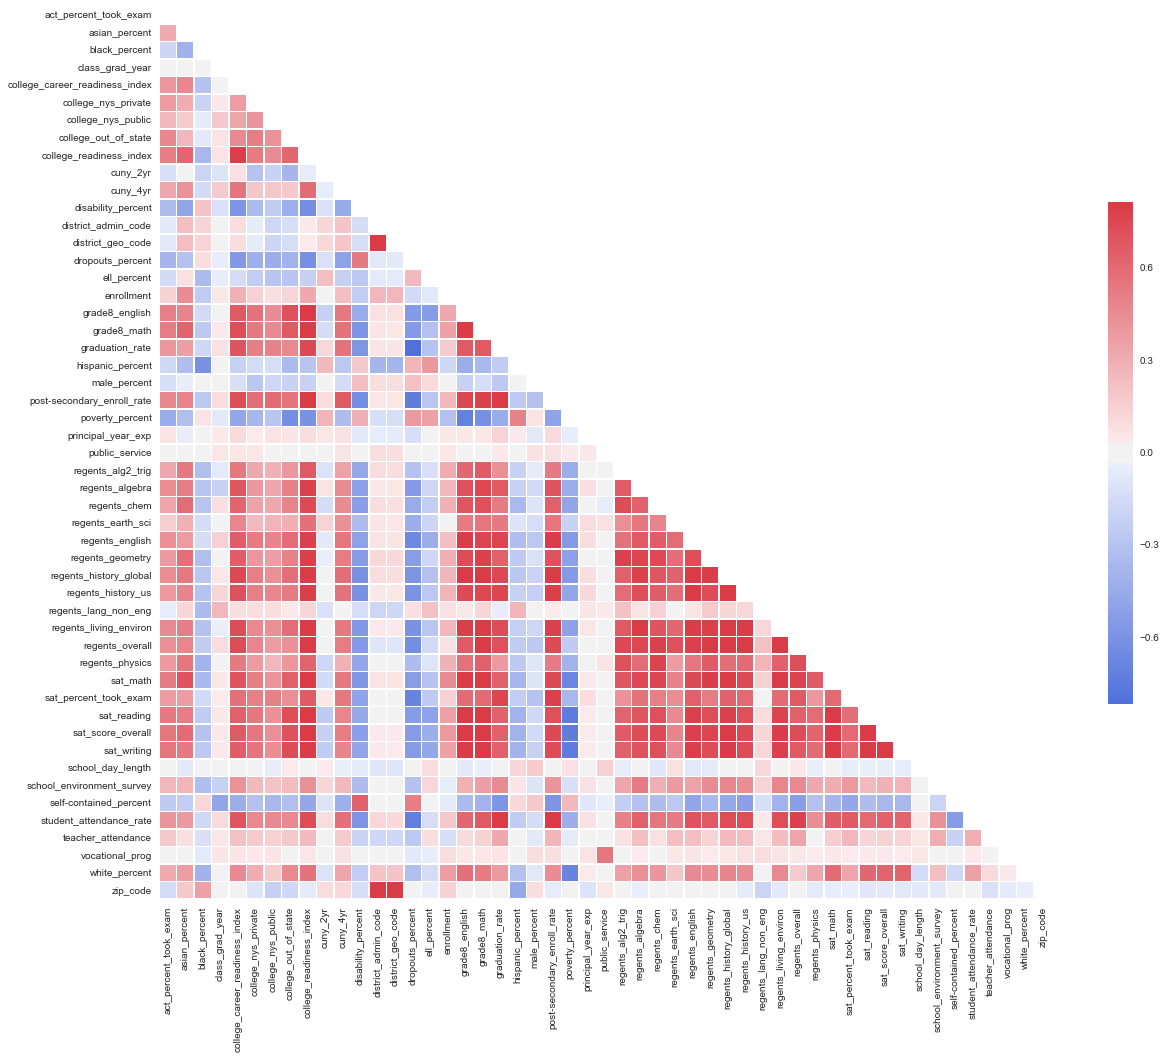

In [4]:
# create correlation heatmap - modified from https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

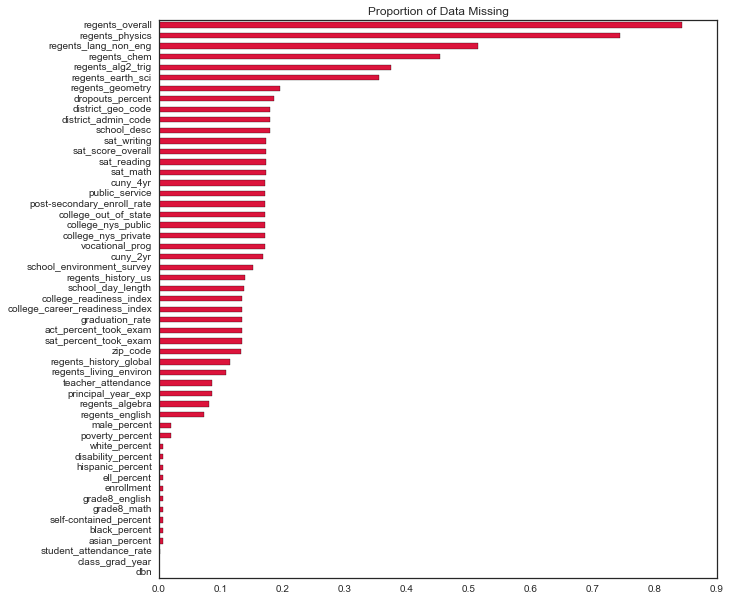

In [12]:
# Show missing data
data.apply(lambda x: sum(x.isnull())*1.0 / len(x)).sort_values().plot(kind='barh', title='Proportion of Data Missing', color='Crimson', figsize=(10,10));

## 4) Why did you choose this topic?

I chose this topic because I have worked as an education consultant for several years, tutoring the SAT and ACT and helping teenagers get into college. I have also volunteered in this capacity for low-income students. Several articles have come out recently pointing out that although graduation rates in NYC public schools have risen over the years, the rate of students prepared for college has remained low. Thus, NYC public schools are graduating many students each year who are not considered college-ready. Keeping this discrepency in mind, I was interested in taking a more in-depth look at the NYC public education system via data.